In [1]:
#lending club data project

In [2]:
# a few baselines:
# 1. The mean of the majority class (feature catagory) in the target 
# 2. The influence of the main X.
# 3. A kitchen soup linear/logistic regression. 

In [3]:
# Note: Additive approach:
# look at individual feature importances (https://colab.research.google.com/drive/1QJuc5m49nBLm2dh-U9ZiGMcWmFel2xZT#scrollTo=tsmIIGfyjUYd)
# and (start by) adding more (rather than subtracting) X features

In [4]:
# header descriptions...or not...
#https://www.kaggle.com/wendykan/lending-club-loan-data

In [1]:
# Q What will the baseline be?
# What will the target be?
# What will the post-hoc justification for looking be?


In [2]:
import pandas as pd



In [3]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
#so more head displays
#override display option
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
# for colab
# upload file from local drives
#from google.colab import files
#uploaded = files.upload()

In [6]:
#file from computer drive
df_all = pd.read_csv(r"C:\Users\linea\Downloads\data\lending club\lending_club_loans_1.csv")

C:\Users\linea\Anaconda3\envs\unit2\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#if file in local environment
#df_all = pd.read_csv('lending_club_loans_1.csv')

In [8]:
df_all.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [9]:
# including only clean, no_time_leak, columns

# Only use these features which had nonzero permutation importances in earlier models    
df = df_all.filter(['disbursement_method',
        'debt_settlement_flag',
        'hardship_flag',
        #is delinq_amnt leakage?
        #'delinq_amnt',
        #is acc_now_delinq leakage?
        #'acc_now_delinq',
        'policy_code',
        #'application_type',
        'last_pymnt_amnt',#maybe time leak
        'total_acc',
        'initial_list_statu',
                    
        #'out_prncp',
        #'out_prncp_inv',#redundant?
        #'total_pymnt',
                    
        #'total_pymnt_inv',#redundant?
#total_rec: here there are issues with leakage and inclusion...e.g. people who paid early but paid in full?
        #'total_rec_prncp',
        #'total_rec_int',
        #'total_rec_late_fee',
        #'recoveries',#this may involve loan deliquency time leak
        #'collection_recovery_fee',#this may involve loan deliquency time leak
                    
        'open_acc', #number of open trades since openind account (time leak?)
        'pub_rec',
        'revol_bal',
                    
        #is delinq_2yrs leakage?
        #'delinq_2yrs',
        #'inq_last_6mths',
                    
        'addr_state',
        'purpose',
        'earliest_cr_line',
        'home_ownership',
        'annual_inc',
        'verification_status',
        'issue_d',
        'loan_status',#target
        'pymnt_pla',
        'loan_amnt',
        'funded_amnt',
                    
        #'funded_amnt_inv',#redundant?
                    
        'term',
        'int_rate',
        'installment',
        'grade',
        'sub_grade'])

In [10]:
#df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [11]:
#df.isna().sum()

In [12]:
df.shape

(2260668, 24)

In [13]:
df.head(2)

,disbursement_method,debt_settlement_flag,hardship_flag,policy_code,last_pymnt_amnt,total_acc,open_acc,pub_rec,revol_bal,addr_state,purpose,earliest_cr_line,home_ownership,annual_inc,verification_status,issue_d,loan_status,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade
0,Cash,N,N,1,84.92,34.0,9.0,1.0,4341,NY,debt_consolidation,Apr-2001,RENT,55000.0,Not Verified,Dec-2018,Current,2500,2500,36 months,13.56,84.92,C,C1
1,Cash,N,N,1,777.23,44.0,13.0,1.0,12315,LA,debt_consolidation,Jun-1987,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,30000,30000,60 months,18.94,777.23,D,D2


In [14]:
#this was moved to the Mangle...Wrangle Function
#the remaining options should be:
#Fully Paid                                             1041952
#Charged Off                                             261655

#df = df[df.loan_status != 'Current']
"""
df = df[df.loan_status != 'Default']
df = df[df.loan_status != 'Late (31-120 days)']
df = df[df.loan_status != 'Late (16-30 days)']
df = df[df.loan_status != 'In Grace Period'] 
df = df[df.loan_status != 'Current']
df = df[df.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
df = df[df.loan_status != 'Does not meet the credit policy. Status:Charged Off']
"""

"\ndf = df[df.loan_status != 'Default']\ndf = df[df.loan_status != 'Late (31-120 days)']\ndf = df[df.loan_status != 'Late (16-30 days)']\ndf = df[df.loan_status != 'In Grace Period'] \ndf = df[df.loan_status != 'Current']\ndf = df[df.loan_status != 'Does not meet the credit policy. Status:Fully Paid']\ndf = df[df.loan_status != 'Does not meet the credit policy. Status:Charged Off']\n"

In [15]:
#This displays the original catagories including current and past loans,
# of which only past loans should be included: 
#FUlly Paid vs. charged off
#df['loan_status'].value_counts().sort_values(ascending=False)#[:10]

In [16]:
#df['issue_d'].value_counts().sort_values(ascending=False)#[:10]

In [17]:
#df.head()

In [18]:
#df['loan_status'].unique()

In [19]:
#df_all['loan_status'].unique().sum()

In [20]:
df_all['loan_status'].value_counts().sort_values(ascending=False)

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [21]:
#df['issue_d'].unique()

In [22]:
#df.head()

In [23]:
#df.tail(3)

In [24]:
#df.isna().sum()

In [25]:
#df.describe(exclude='number')

In [26]:
# note: 2 splits, both based on time. 

# remove all the current loans

In [27]:
# Train, Validate, Test Splits

target = 'loan_status'

# time based split

df["issue_d"] = pd.to_datetime(df["issue_d"], infer_datetime_format=True)
test = df[df['issue_d'] >= '2018-07-01 00:00:00']
train_and_val = df[df['issue_d'] < '2018-07-01 00:00:00']


val = train_and_val[train_and_val['issue_d'] < '2016-07-01 00:00:00']
train = train_and_val[train_and_val['issue_d'] >= '2016-07-01 00:00:00']



In [28]:
train.shape, val.shape, test.shape

((884881, 24), (1119181, 24), (256606, 24))

In [29]:
df.head(3)

,disbursement_method,debt_settlement_flag,hardship_flag,policy_code,last_pymnt_amnt,total_acc,open_acc,pub_rec,revol_bal,addr_state,purpose,earliest_cr_line,home_ownership,annual_inc,verification_status,issue_d,loan_status,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade
0,Cash,N,N,1,84.92,34.0,9.0,1.0,4341,NY,debt_consolidation,Apr-2001,RENT,55000.0,Not Verified,2018-12-01,Current,2500,2500,36 months,13.56,84.92,C,C1
1,Cash,N,N,1,777.23,44.0,13.0,1.0,12315,LA,debt_consolidation,Jun-1987,MORTGAGE,90000.0,Source Verified,2018-12-01,Current,30000,30000,60 months,18.94,777.23,D,D2
2,Cash,N,N,1,180.69,13.0,8.0,0.0,4599,MI,debt_consolidation,Apr-2011,MORTGAGE,59280.0,Source Verified,2018-12-01,Current,5000,5000,36 months,17.97,180.69,D,D1


In [30]:
    df['loan_status'].replace('Fully Paid', 1, inplace=True)
    df['loan_status'].replace('Charged Off', 0, inplace=True)

In [31]:
# Wrangle Function + Make Family of Variables



def wrangle(X):
    #Wrangles train, validate, and test sets in the same way
    X = X.copy()

    # Convert date_recorded to datetime
    #X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    #X['issue_d'] = pd.to_datetime(X['issue_d'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year'] = X['issue_d'].dt.year
    X['month'] = X['issue_d'].dt.month
    X['day'] = X['issue_d'].dt.day
    X = X.drop(columns='issue_d')
    
    # Engineer feature: how many years from construction_year to date_recorded
    #X['years'] = X['year_recorded'] - X['construction_year']    
    
    # Drop recorded_by (never varies) and id (always varies, random)
    #unusable_variance = ['recorded_by', 'id']
    #X = X.drop(columns=unusable_variance)
    
    # Removing current rows (to avoid time-leakage/time-travel)
    #the remaining options should be:
    #Fully Paid                                             1041952
    #Charged Off                                             261655
    #df = df[df.loan_status != 'Current']
    X = X[X.loan_status != 'Default']
    X = X[X.loan_status != 'Late (31-120 days)']
    X = X[X.loan_status != 'Late (16-30 days)']
    X = X[X.loan_status != 'In Grace Period'] 
    X = X[X.loan_status != 'Current']
    X = X[X.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
    X = X[X.loan_status != 'Does not meet the credit policy. Status:Charged Off']
    
    #X = X.dropna()

    # Drop duplicate columns
    #duplicate_columns = ['quantity_group']
    #X = X.drop(columns=duplicate_columns)
    '''
    #dropping rows
    #not looking at current-incomplete loan data
    #removing not-current rows
    X = X[X.loan_status != 'Default']
    X = X[X.loan_status != 'Late (31-120 days)']
    X = X[X.loan_status != 'Late (16-30 days)']
    X = X[X.loan_status != 'In Grace Period'] 
    X = X[X.loan_status != 'Current']
    X = X[X.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
    X = X[X.loan_status != 'Does not meet the credit policy. Status:Charged Off']
    
    
    # Drop empty NaN columns
    empty_columns = ['quantity_group',
                    'revol_bal_joint',
                    'sec_app_earliest_cr_line',
                    'sec_app_inq_last_6mths',
                    'sec_app_mort_acc',
                    'sec_app_open_acc',
                    'sec_app_revol_util',
                    'sec_app_open_act_il',
                    'sec_app_num_rev_accts',
                    'sec_app_chargeoff_within_12_mths',
                    'sec_app_collections_12_mths_ex_med',
                    'sec_app_mths_since_last_major_derog',
                    'hardship_type',
                    'hardship_reason',
                    'hardship_status',
                    'deferral_term',
                    'hardship_amount',
                    'hardship_start_date',
                    'hardship_end_date',
                    'payment_plan_start_date',
                    'hardship_length',
                    'hardship_dpd',
                    'hardship_loan_status',
                    'orig_projected_additional_accrued_interest',
                    'hardship_payoff_balance_amount',
                    'hardship_last_payment_amount',
                    'debt_settlement_flag_date',
                    'settlement_status',
                    'settlement_date',
                    'settlement_amount',
                    'settlement_percentage',
                    'settlement_term',
                    'id',
                    'member_id',
                    'url',
                    'desc',
                    'mths_since_last_delinq',
                    'mths_since_last_record',
                    'next_pymnt_d',
                    'annual_inc_joint',
                    'dti_joint',
                    'verification_status_joint'
                     ]
    
    X = X.drop(columns=empty_columns)
    '''
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these like null values
    #X['latitude'] = X['latitude'].replace(-2e-08, np.nan)
    
    # When columns have zeros and shouldn't, they are like null values
    #cols_with_zeros = ['construction_year', 'longitude', 'latitude', 'gps_height', 'population']
    #for col in cols_with_zeros:
    #    X[col] = X[col].replace(0, np.nan)
        
    return X





In [32]:
# 2(or 4) splits
# df -> train_and_validate and test
# train_val -> train and val
# Split train into train & val. Make val the same size as test.


#train, val = train_test_split(train, test_size=len(test),  
#                              stratify=train[target], random_state=42)

# Wrangle train, validate, and test sets in the same way
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [37]:
#checking to see if current options (rows leaking from future) were removed

In [38]:
train['loan_status'].value_counts().sort_values(ascending=False)

Fully Paid     236861
Charged Off     71264
Name: loan_status, dtype: int64

In [39]:
val['loan_status'].value_counts().sort_values(ascending=False)

Fully Paid     794181
Charged Off    189767
Name: loan_status, dtype: int64

In [40]:
test['loan_status'].value_counts().sort_values(ascending=False)

Fully Paid     10910
Charged Off      624
Name: loan_status, dtype: int64

In [41]:
#exports df (current working directory)
#train.to_csv('train_loanclub_wrangled3.csv')

In [42]:
#exports df (current working directory)
#val.to_csv('val_loanclub_wrangled3.csv')

In [43]:
#exports df (current working directory)
#test.to_csv('test_loanclub_wrangled3.csv')

In [33]:
# Arrange data into X features matrix and y target vector
X_train = train.drop(columns=target)
y_train = train[target]

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

In [34]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((308125, 25), (983948, 25), (11534, 25), (308125,), (983948,), (11534,))

In [35]:
# Making Plots

In [36]:
#!pip install category_encoders

In [37]:
import category_encoders as ce

In [38]:

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

In [45]:
#import category_encoders as ce
#from sklearn.impute import SimpleImputer
#from sklearn.pipeline import make_pipeline
#from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

#model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.966573	validation_1-auc:0.830053
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.966782	validation_1-auc:0.827252
[2]	validation_0-auc:0.968668	validation_1-auc:0.83135
[3]	validation_0-auc:0.968598	validation_1-auc:0.831293
[4]	validation_0-auc:0.969732	validation_1-auc:0.831755
[5]	validation_0-auc:0.97709	validation_1-auc:0.881912
[6]	validation_0-auc:0.97904	validation_1-auc:0.883364
[7]	validation_0-auc:0.979577	validation_1-auc:0.890388
[8]	validation_0-auc:0.979715	validation_1-auc:0.890586
[9]	validation_0-auc:0.979852	validation_1-auc:0.891714
[10]	validation_0-auc:0.982288	validation_1-auc:0.895445
[11]	validation_0-auc:0.98272	validation_1-auc:0.896799
[12]	validation_0-auc:0.983269	validation_1-auc:0.900464
[13]	validation_0-auc:0.983485	validation_1-auc:0.904417
[14]	validation_0-auc:0.984824	validation_1-auc:0.905144
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba))

Test ROC AUC for class 1:
0.9835719552750947


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

AttributeError: 'SimpleImputer' object has no attribute 'predict_proba'

In [ ]:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
# How to print an AUC?

In [47]:
#eli5 permutation importance

NameError: name 'RandomForestClassifier' is not defined

In [49]:
import eli5
from eli5.sklearn import PermutationImportance

In [50]:
permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=None,
                                              n_estimators=1000, n_jobs=-1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, silent=None,
                   

In [51]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

last_pymnt_amnt         1.662444e-01
debt_settlement_flag    1.639904e-02
int_rate                2.339351e-03
loan_amnt               6.549127e-04
term                    4.939285e-04
day                     0.000000e+00
purpose                 0.000000e+00
hardship_flag           0.000000e+00
policy_code             0.000000e+00
total_acc               0.000000e+00
pub_rec                 0.000000e+00
revol_bal               0.000000e+00
addr_state              0.000000e+00
home_ownership          0.000000e+00
earliest_cr_line        0.000000e+00
month                   0.000000e+00
annual_inc              0.000000e+00
verification_status     0.000000e+00
funded_amnt             0.000000e+00
sub_grade               0.000000e+00
year                    0.000000e+00
disbursement_method     0.000000e+00
open_acc               -2.032628e-07
grade                  -3.170899e-05
installment            -1.835463e-04
dtype: float64

In [52]:
eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.1662 ± 0.0004,last_pymnt_amnt
0.0164 ± 0.0002,debt_settlement_flag
0.0023 ± 0.0001,int_rate
0.0007 ± 0.0000,loan_amnt
0.0005 ± 0.0000,term
0 ± 0.0000,day
0 ± 0.0000,purpose
0 ± 0.0000,hardship_flag
0 ± 0.0000,policy_code
0 ± 0.0000,total_acc


Trying Random Forest Feature Importance (note: there are no categoricals...)

The scikit-learn Random Forest feature importance ... tends to inflate the importance of continuous or high-cardinality categorical variables. ... Breiman and Cutler, the inventors of Random Forests, indicate that this method of “adding up the gini decreases for each individual variable over all trees in the forest gives a fast variable importance that is often very consistent with the permutation importance measure.” — Beware Default Random Forest Importances

In [57]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [58]:
#Make pipeline
pipeline = make_pipeline(
    #encode varibles
    ce.OrdinalEncoder(),
    #here there are few/no NaN values (in first sweep)
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)


In [59]:
# Fitting on train, scoring on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7796062393541122


In [60]:
from sklearn.metrics import accuracy_score

In [61]:
# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
#print('Validation Accuracy', accuracy_score(y_val, y_pred))

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[181392,   8375],
       [208481, 585700]], dtype=int64)

In [64]:
# We need to get labels
from sklearn.utils.multiclass import unique_labels
unique_labels(y_val)

array(['Charged Off', 'Fully Paid'], dtype='<U11')

In [65]:
# 1. Check that our labels are correct

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    return columns, index

plot_confusion_matrix(y_val, y_pred)

(['Predicted Charged Off', 'Predicted Fully Paid'],
 ['Actual Charged Off', 'Actual Fully Paid'])

In [66]:
# 2. Make it a pandas dataframe
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return table

plot_confusion_matrix(y_val, y_pred)

,Predicted Charged Off,Predicted Fully Paid
Actual Charged Off,181392,8375
Actual Fully Paid,208481,585700


In [67]:
import seaborn as sns

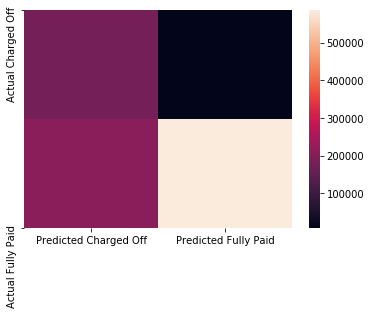

In [68]:

# 3. Plot a heatmap
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    #return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
    return sns.heatmap(table)

plot_confusion_matrix(y_val, y_pred);

In [75]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['disbursement_method',
                                      'debt_settlement_flag', 'hardship_flag',
                                      'addr_state', 'purpose',
                                      'earliest_cr_line', 'home_ownership',
                                      'verification_status', 'term', 'grade',
                                      'sub_grade'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'disbursement_method',
                                          'data_ty...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth

In [76]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.7618756275738149
